## Hypothesis Testing - Toddler Mass Data

In [73]:
# import relevant packages

import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Background

Local authority introduces scheme to address child malnutrition.

Data: weight (in kg) of four-year olds.

Sample 1: 100 pre-intervention

Sample 2: 100 post-intervention

(Note: The two samples are of different children)

In [55]:
# 假设检验—不同地区男女工作机会和薪资是否有差异
data_tmp=pd.read_csv('F:\杨心砚\Annual pay2020.csv')
data_tmp

Description       Code Number_jobs_Male Median_Male Mean_Male  \
0        United Kingdom   K02000001           11,112      31,445    38,584   
1          Great Britain  K03000001           10,650      31,636    38,828   
2      England and Wales  K04000001            9,775      31,613    39,062   
3                England  E92000001            9,283      31,813    39,441   
4            North East   E12000001              389      28,196    32,325   
..                   ...        ...              ...         ...       ...   
306             Stirling  S12000030               16      32,317    38,445   
307  West Dunbartonshire  S12000039               13      33,226    34,941   
308         West Lothian  S12000040               29      32,306    35,391   
309    Northern Ireland   N92000002              391      27,403    32,242   
310       Not Classified        NaN               71      28,909    36,798   

    Number_jobs_Female Median_Female Mean_Female  
0               11,438        20,515      24,796  
1               10,954        20,596      24,907  
2                9,884        20,449      24,911  
3                9,327        20,512      25,068  
4                  413        18,981      22,283  
..                 ...           ...         ...  
306                 15        21,915      28,066  
307                 21        21,084      22,701  
308                 37        24,045      26,157  
309                414        18,880      22,312  
310                 69        18,125      22,127  

[311 rows x 8 columns]

In [58]:

for j in ['Number_jobs_Male','Median_Male','Mean_Male','Number_jobs_Female','Median_Female','Mean_Female']:
    row=0
    print(j)
    for i in data_tmp[j]:
        if i=='x':
            print(row)
            #data_tmp=data_tmp.drop([row],inplace=True)
            data_tmp=data_tmp.drop([row])
        row+=1
    #data_tmp.to_csv('path/Result.csv')

Number_jobs_Male
Median_Male
Mean_Male
Number_jobs_Female
Median_Female
Mean_Female


In [96]:
# Get the data on the weights of 4-year-olds:
#data = pd.read_csv('Annualpay2020.csv')[['sample_1','sample_2']]
#sample_1='Mean_Male'
#sample_2='Mean_Female'
sample_1='Median_Male'
sample_2='Median_Female'
data = pd.read_csv('F:\杨心砚\Annual pay2020.csv')[[sample_1,sample_2]]

# Look at the first few rows:
data.head()

Median_Male  Median_Female
0        31445          20515
1        31636          20596
2        31613          20449
3        31813          20512
4        28196          18981

In [97]:
data1.loc[0]

38584

In [98]:
data1.min()

24967

In [99]:
data1.max()

67989

In [100]:
# For convenience...

# Store each sample separately:
#data1 = data['sample_1']
#data2 = data['sample_2']
data1 = data[sample_1]
data2 = data[sample_2]

# Store some useful values

min1 = data1.min()
min2 = data2.min()

max1 = data1.max()
max2 = data2.max()

mean1 = data1.mean()
mean2 = data2.mean()

std1 = data1.std()
std2 = data2.std()

n1 = len(data1)
n2 = len(data2)

# And print some summary information:

data.describe()

Median_Male  Median_Female
count    311.000000     311.000000
mean   31465.131833   20431.266881
std     4369.447056    3257.054719
min    21138.000000   14464.000000
25%    28527.000000   18526.000000
50%    30800.000000   19739.000000
75%    33663.000000   21803.000000
max    46789.000000   40002.000000

In [101]:
hist_min

16336

In [102]:
hist_max

67991

<AxesSubplot:>

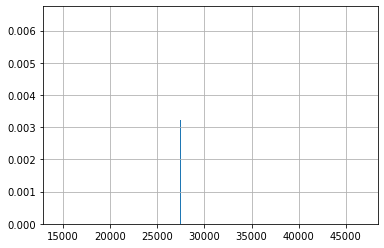

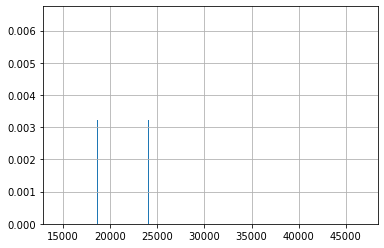

In [105]:
# Visualise the distribution of the data (as histograms)

# Set common x-limits for the histograms:
# (using int() is a trick to round to the integer below)
hist_min = int(min(min1,min2)) - 1
hist_max = int(max(max1,max2)) + 2
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
#y_range = [0.0,0.4]

# Choose an appropriate number of columns for the histogram:
# (This choice will give us columns of width 1)
n_cols = hist_max - hist_min

# Now create the plots:
# (The plt.figure(x) functions create new plots preventing...
# ... both histograms from being drawn on the same axes.)

plt.figure(1)
#data['sample_1'].hist(range=x_range, bins=n_cols, normed=True)
data[sample_1].hist(range=x_range, bins=n_cols, density=True, stacked=True)
#plt.ylim(y_range)

plt.figure(2)
#plt.ylim(y_range)
#data['sample_2'].hist(range=x_range, bins=n_cols, normed=True)
data[sample_2].hist(range=x_range, bins=n_cols, density=True, stacked=True)


In [ ]:
# The distributions look roughly normal.
# They do seem a little different, but could this be down to random chance?

### Test 1 - Mean Comparison Test

The two samples have different means, but let's test whether this could be down to random chance.

Could they be drawn from populations with the same mean?

(The sample sizes (100) are fairly large so the mean comparison test is valid.)

Step 1

In [ ]:
# H0: Mean of population 1 =  Mean of population 1
# H1: Mean of population 1 <> Mean of population 1

Step 2

In [106]:
# Set significance level:

alpha = 0.05

Step 3-4

In [107]:
# There is a built-in scipy.stats function (ttest_ind) that does steps 3 and 4 for us.
# We just need to know whether we can assume that the samples are drawn...
# ... from populations with the same standard deviation or not.
# (Provided neither standard deviation is double the other, this should be ok)

std_ratio = std1/std2

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std_ratio = 1.3415332049770845
Can assume equal population standard deviations.


In [108]:
# Calculate the test statistic and the p-value:
# (We don't actually need the test statistic, since it is only used to calculate the p-value anyway.)

test_stat, p_value = sps.ttest_ind(data1, data2, equal_var = equal_stds)
print("p-value =", p_value)

p-value = 1.5343302143430972e-152


Step 5

In [109]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


### Test 2 - KS Distribution Test

What about the shape of the distributions?

Could the visible difference in the distributions (see the histograms) be down to random chance?

(The data is continuous, so the KS test is valid.)

Step 1

In [110]:
# H0: Sample 1 and Sample 2 are drawn from identical distributions.
# H1: Sample 1 and Sample 2 are not drawn from identical distributions.

Step 2

In [111]:
# Set significance level:

alpha = 0.05

Step 3-4

In [112]:
# There is a built-in scipy.stats function (ks_2samp) that does steps 3 and 4 for us:

KS_stat, p_value = sps.ks_2samp(data1,data2)

# Compare with the KS stat we calculated earlier:

print("KS stat =", KS_stat)
print("p-value =", p_value)

KS stat = 0.8938906752411575
p-value = 2.733025743013628e-131


Step 5

In [113]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different distributions.
